# Lab 1: Machine Learning and Data Acquisition

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\olsso\anaconda3\envs\DT374B\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


TODO: record new data with 100ms interval and clean start and stop

## Acquire some data

Function for reading csv file:

In [2]:
def read_csv(filepath, cols, names):
    df = pd.read_csv(filepath, usecols=cols, names=names, header=None)
    df = df.drop([0], axis=0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

### Accelerometer

In [3]:
lie_acc_data = read_csv("data/raw/train/lie_acc1.csv", [2,3,4], ['ax', 'ay', 'az'])
stand_acc_data = read_csv("data/raw/train/stand_acc1.csv", [2,3,4], ['ax', 'ay', 'az'])

In [4]:
lie_acc_data

,ax,ay,az
1,0.900300,9.901201,-0.349352
2,0.325424,9.990034,-0.416650
3,0.088235,10.121640,-0.397209
4,0.222233,10.088140,-0.486042
5,0.425922,10.124033,-0.354138
...,...,...,...
1396,-0.462712,9.189935,0.915255
1397,-0.453141,9.335897,0.697508
1398,-0.453141,9.335897,0.697508
1399,-0.453141,9.335897,0.697508


* Plot the accelerometer values using the the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector.

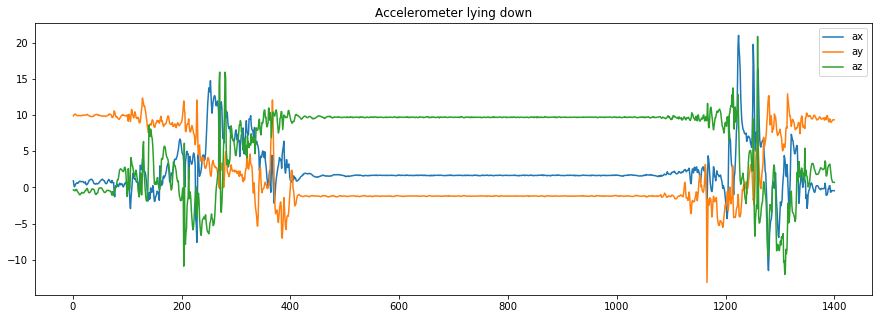

In [5]:
lie_acc_data.plot(kind = "line", title = "Accelerometer lying down", figsize=(15,5))
plt.show()

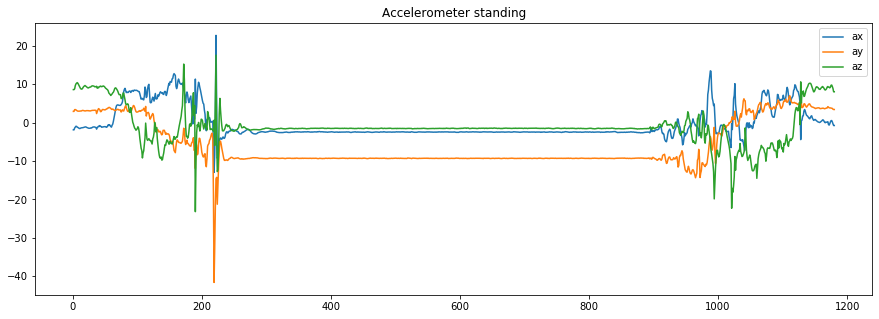

In [6]:
stand_acc_data.plot(kind = "line", title = "Accelerometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the accelerometer?<p>

    G-force. If the accelerometer is reasonably leveled one axis should show about &pm;1g and the other two axes around 0g.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the accelerometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [7]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 100 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Even though the phone (and hence the accelerometer) is still, the output from the three axes is different in the two plots. The reason is that the phone is positioned differently in regards to earths gravitation laying down compared to standing. Therefore, earth's gravity pulls different axes.

### Magnetometer

In [8]:
lie_mag_data = read_csv("data/raw/train/lie_mag1.csv", [2,3,4], ['mx', 'my', 'mz'])
stand_mag_data = read_csv("data/raw/train/stand_mag1.csv", [2,3,4], ['mx', 'my', 'mz'])

In [9]:
lie_mag_data

,mx,my,mz
1,-32.718750,-48.562504,-29.043750
2,-30.018751,-46.968750,-28.200000
3,-30.975000,-48.750004,-27.468752
4,-32.512500,-47.456253,-26.325000
5,-31.968752,-45.900000,-27.525002
...,...,...,...
1410,-30.150002,-18.600000,-43.443752
1411,-30.150002,-18.600000,-43.443752
1412,-30.150002,-18.600000,-43.443752
1413,-30.150002,-18.600000,-43.443752


* Plot the magnetometer values using the the plot functions accessible for panda dataframes. Plot all magnetometer values, i.e. all samples for all components of the magnetometer vector.

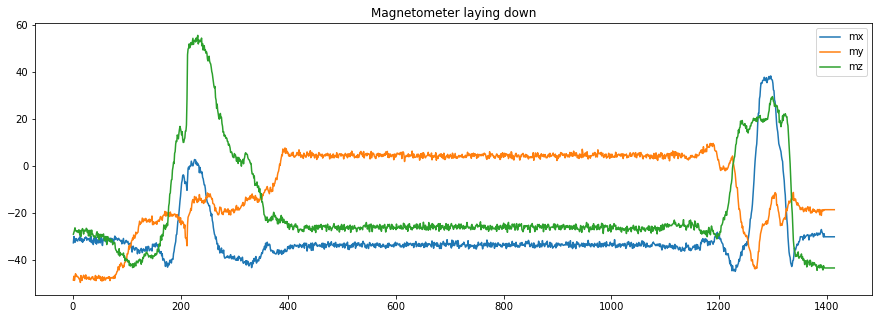

In [10]:
lie_mag_data.plot(kind = "line", title = "Magnetometer laying down", figsize=(15,5))
plt.show()

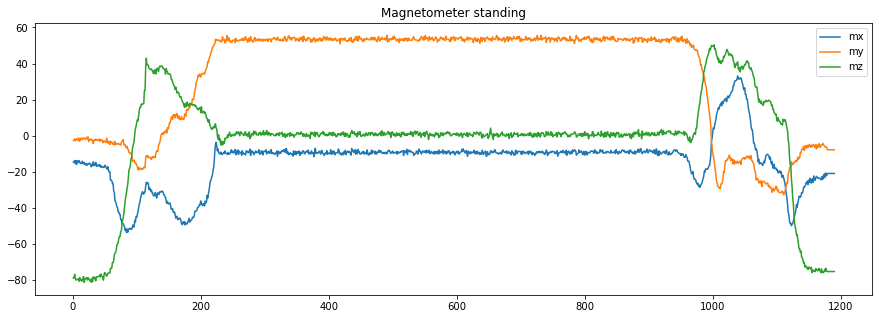

In [11]:
stand_mag_data.plot(kind = "line", title = "Magnetometer standing", figsize=(15,5))
plt.show()

* What are we measuring with the magnetometer?<p>
    
    The force of the magnetic field around the phone.

* There is time information both in the csv-file and in the setup in the app. What is the sample time of the magnetometer data? Sample time is the timdifference between two consecutive samples? What is the sampe frequency? The sample frequency is the inverse of the sample time.<p>

    In the app the sample time is set to 10. The unit is not shown in the app. The csv-file reveals the unit being milliseconds.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Frequency (_f_):

In [12]:
1 / (10 * 10**-3)

100.0

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_f_ = 10 samples per second

* By looking at the plots can you see the difference between the two classes? Explain, and take some notes for future work.<p>
    
    Assuming earth's magnetic field has the largest contribution to the magnetic field around the phone and all other magnetic field components are negligible, the same reasoning should hold true for the magnetometer as for the accelerometer - the phone is positioned differently in space, thus giving different output in the three axes.

## Vector algebra

### Formulas

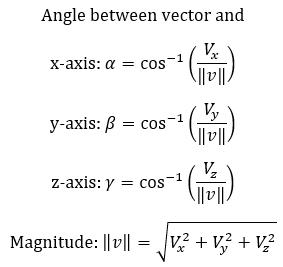

### Calculation functions

In [13]:
def calc_norm(df, i):
    return np.linalg.norm(df.iloc[i])

In [14]:
def calc_norms(df):
    l = []
    
    for i in range(len(df)):
        l.append(calc_norm(df, i))
        
    return pd.DataFrame({'Norm': l})

In [15]:
def calc_angle(df, axis, i):
    return np.rad2deg(np.arccos(df[axis].iloc[i] / calc_norm(df, i)))

In [16]:
def calc_angles(df, axis):
    l = []
    
    for i in range(len(df)):
        l.append(calc_angle(df, axis, i))
        
    return pd.DataFrame({'Angle': l})

### Calculations and plots

* Calculate the angle between the acceleration values and the z-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

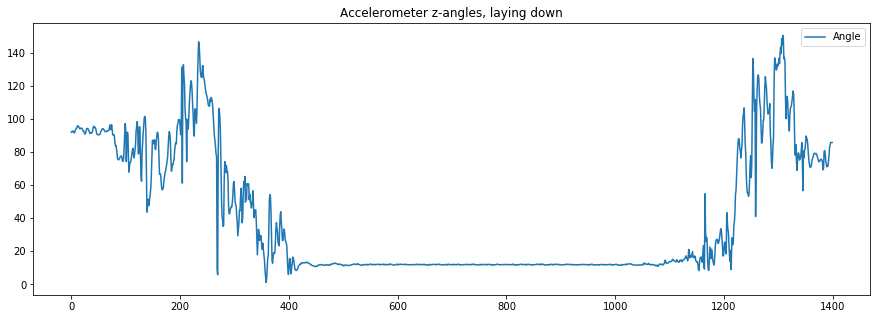

In [17]:
lie_acc_z_angles = calc_angles(lie_acc_data, lie_acc_data.columns[2])
lie_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, laying down", figsize=(15,5))
plt.show()

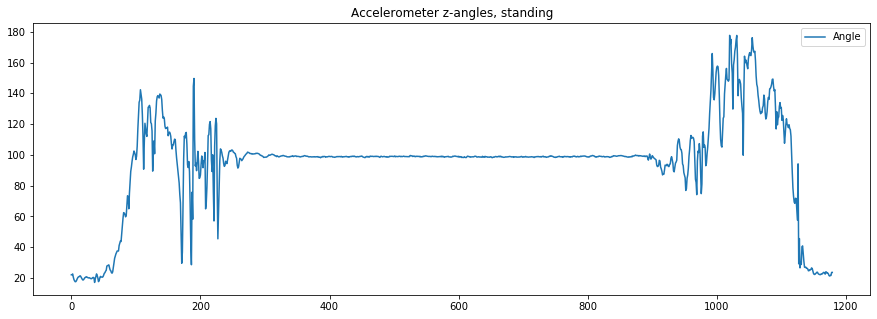

In [18]:
stand_acc_z_angles = calc_angles(stand_acc_data, stand_acc_data.columns[2])
stand_acc_z_angles.plot(kind = "line", title = "Accelerometer z-angles, standing", figsize=(15,5))
plt.show()

* Calculate the angle between the magnetometer values and the y-direction for all samples, store it in a dataframe and plot it. Do this for both classes.

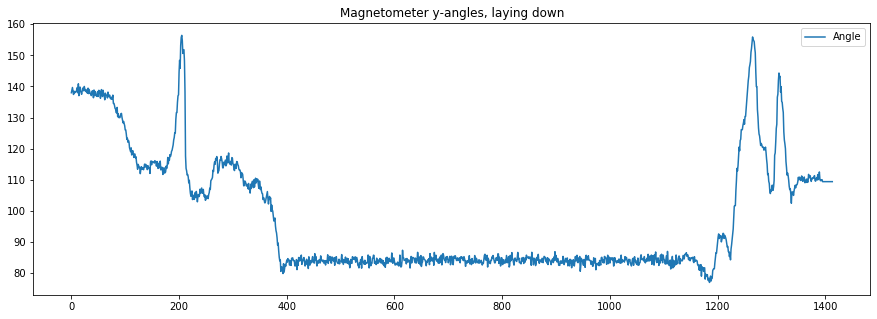

In [19]:
lie_mag_y_angles = calc_angles(lie_mag_data, lie_mag_data.columns[1])
lie_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, laying down", figsize=(15,5))
plt.show()

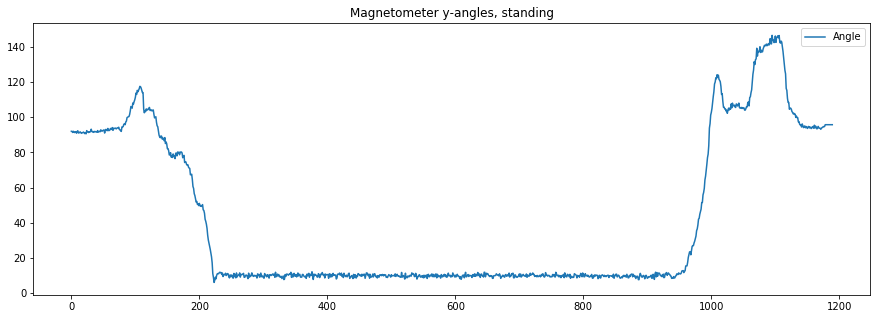

In [20]:
stand_mag_y_angles = calc_angles(stand_mag_data, stand_mag_data.columns[1])
stand_mag_y_angles.plot(kind = "line", title = "Magnetometer y-angles, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the accelerometer data for all samples, store and plot.

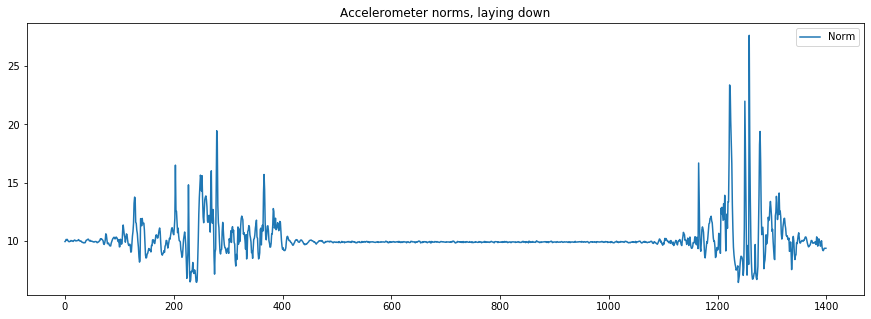

In [21]:
lie_acc_norms = calc_norms(lie_acc_data)
lie_acc_norms.plot(kind = "line", title = "Accelerometer norms, laying down", figsize=(15,5))
plt.show()

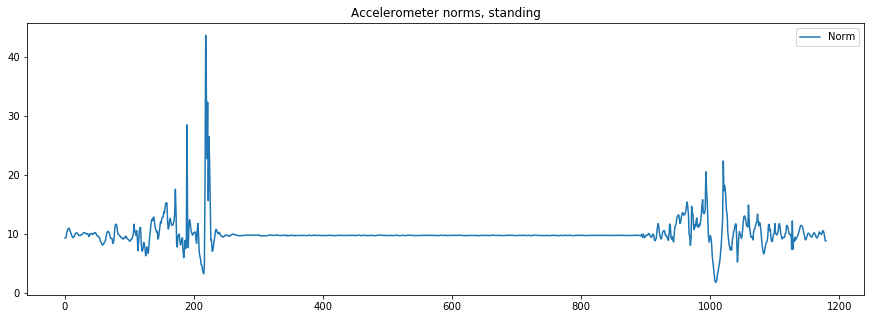

In [22]:
stand_acc_norms = calc_norms(stand_acc_data)
stand_acc_norms.plot(kind = "line", title = "Accelerometer norms, standing", figsize=(15,5))
plt.show()

* Calculate the magnitude (length,norm) for the magnetometer data for all samples, store and plot.

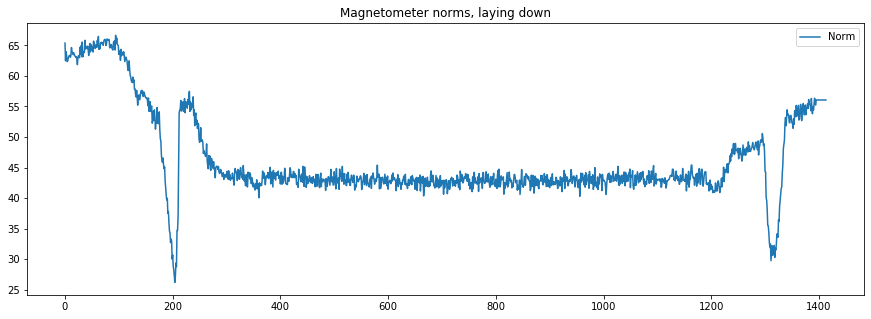

In [23]:
lie_mag_norms = calc_norms(lie_mag_data)
lie_mag_norms.plot(kind = "line", title = "Magnetometer norms, laying down", figsize=(15,5))
plt.show()

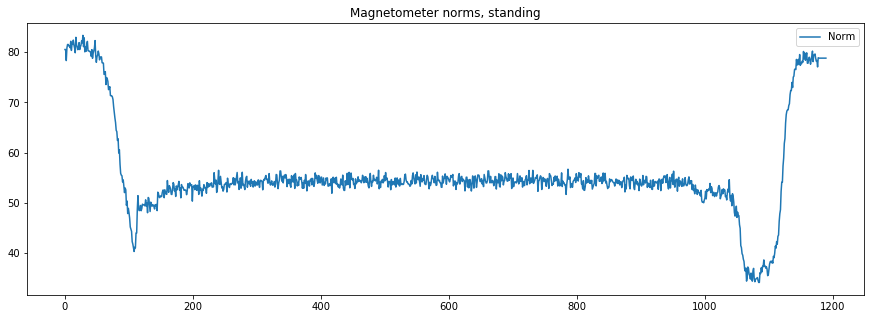

In [24]:
stand_mag_norms = calc_norms(stand_mag_data)
stand_mag_norms.plot(kind = "line", title = "Magnetometer norms, standing", figsize=(15,5))
plt.show()

## Clean up data

### Removal of corrupt data

As seen in the graphs, the beginning and the end of the data sets do not represent the different classes. This corrupt data is taken away and saved in new files in the folder 'cleaned'. The raw data is stored in the folder 'raw'.

All 'acc' files are read into a list, then the corresponding 'mag' file is also read. It is importans to remove data at the same indexes in the data pair, as they are connected, i.e., recorder simultaneously. Both data sets are plotted for manual inspection. Then the upper and lower limits are set and the data pair is cleaned and stored.

Function for reading all csv files::

In [25]:
import glob

def read_all_acc_csvs(path):
    files = []
    
    for file in glob.glob(path + '*/' '*acc*.csv'):
        files.append(file)
        
    return files

Read in all raw data files:

In [26]:
raw_data_files = read_all_acc_csvs('data/raw/')
raw_data_files

['data/raw\\test\\lie_acc3.csv',
 'data/raw\\test\\sit_acc3.csv',
 'data/raw\\test\\stand_acc3.csv',
 'data/raw\\train\\lie_acc1.csv',
 'data/raw\\train\\lie_acc2.csv',
 'data/raw\\train\\sit_acc1.csv',
 'data/raw\\train\\sit_acc2.csv',
 'data/raw\\train\\stand_acc1.csv',
 'data/raw\\train\\stand_acc2.csv']

Inspect raw data:

In [27]:
file_index = 8

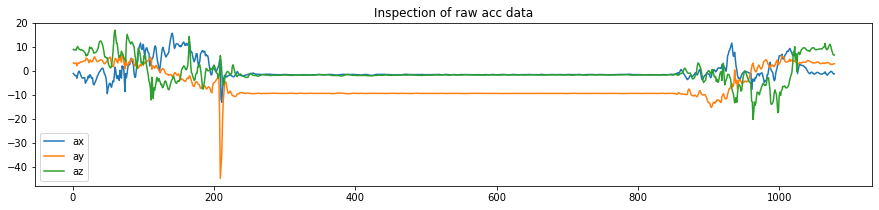

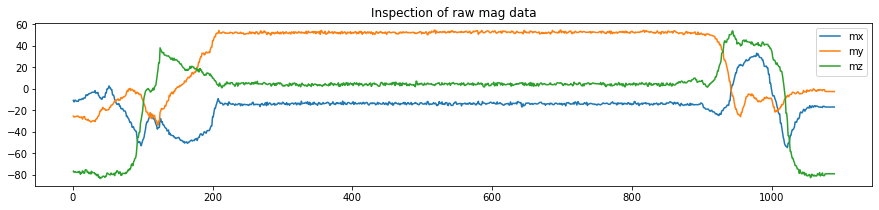

In [28]:
temp_df_acc = read_csv(raw_data_files[file_index], [2,3,4], ['ax', 'ay', 'az'])
temp_df_acc.plot(kind = "line", title='Inspection of raw acc data', figsize=(15,3))
plt.show()

temp_df_mag = read_csv(raw_data_files[file_index].replace('acc', 'mag'), [2,3,4], ['mx', 'my', 'mz'])
temp_df_mag.plot(kind = "line", title='Inspection of raw mag data', figsize=(15,3))
plt.show()

Select lower and upper bounds for removal:

In [29]:
lower = 300
upper = 800

Remove corrupt data:

In [30]:
upper = upper - lower

# Remove first part
temp_df_acc = temp_df_acc.drop(temp_df_acc.index[:lower], axis=0)
temp_df_mag = temp_df_mag.drop(temp_df_mag.index[:lower], axis=0)

# Remove last part
temp_df_acc = temp_df_acc.drop(temp_df_acc.index[upper:], axis=0)
temp_df_mag = temp_df_mag.drop(temp_df_mag.index[upper:], axis=0)

Inspect cleaned data:

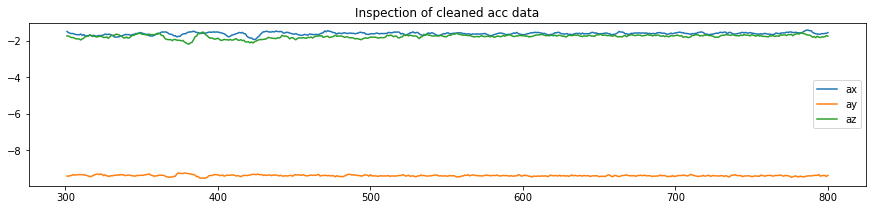

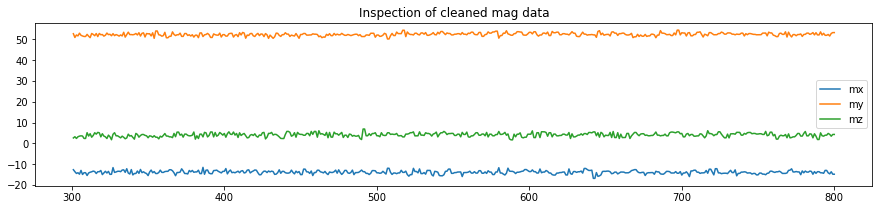

In [31]:
temp_df_acc.plot(kind = "line", title='Inspection of cleaned acc data', figsize=(15,3))
plt.show()

temp_df_mag.plot(kind = "line", title='Inspection of cleaned mag data', figsize=(15,3))
plt.show()

Write cleaned data to new file:

In [32]:
cleaned_acc_file_path = raw_data_files[file_index].replace('raw', 'cleaned')
cleaned_mag_file_path = raw_data_files[file_index].replace('raw', 'cleaned').replace('acc', 'mag')

with open(cleaned_acc_file_path, 'w') as f:
    f.close()
temp_df_acc.to_csv(cleaned_acc_file_path)

with open(cleaned_mag_file_path, 'w') as f:
    f.close()
temp_df_mag.to_csv(cleaned_mag_file_path)

print(cleaned_acc_file_path)
print(cleaned_mag_file_path)

data/cleaned\train\stand_acc2.csv
data/cleaned\train\stand_mag2.csv


### Averaging of data points

In [33]:
"""
for i in file:
    df = pd.read_csv(i.strip())
        if 'Acc' in i:
            df = df.groupby(np.arange(len(df))//10).mean()
"""

"\nfor i in file:\n    df = pd.read_csv(i.strip())\n        if 'Acc' in i:\n            df = df.groupby(np.arange(len(df))//10).mean()\n"

## Python

* Create a python function that can read all files from a class for both sensors. The function should return a dataframe x with all the data and another dataframe y with information of which class the data belongs to.

In [34]:
import glob

def read_csvs(class_name, set_name):
    names = ['ax', 'ay', 'az', 'mx', 'my', 'mz']
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['class'])
    
    for file in glob.glob('data/cleaned/' + set_name + '/' + class_name + '*.csv'):
        if 'acc' in file:
            mag_file = file.replace('acc', 'mag')
            
            df_acc = read_csv(file, [1,2,3], names[:3])
            df_mag = read_csv(mag_file, [1,2,3], names[3:])
            
            df = pd.concat([df_acc, df_mag], axis=1, join='inner')
            X = X.append(df, ignore_index=True)
            
            print(file + '\tLength: ', end='')
            print(len(df_acc))
            print(mag_file + '\tLength: ', end='')
            print(len(df_mag))
            #print(X)
            
    y['class'] = [class_name for i in range(len(X))]
        
    return X, y

In [35]:
X_sit_train, y_sit_train = read_csvs('sit', 'train')

data/cleaned/train\sit_acc1.csv	Length: 500
data/cleaned/train\sit_mag1.csv	Length: 500
data/cleaned/train\sit_acc2.csv	Length: 450
data/cleaned/train\sit_mag2.csv	Length: 450


In [36]:
X_stand_train, y_stand_train = read_csvs('stand', 'train')

data/cleaned/train\stand_acc1.csv	Length: 550
data/cleaned/train\stand_mag1.csv	Length: 550
data/cleaned/train\stand_acc2.csv	Length: 500
data/cleaned/train\stand_mag2.csv	Length: 500


In [37]:
X_lie_train, y_lie_train = read_csvs('lie', 'train')

data/cleaned/train\lie_acc1.csv	Length: 550
data/cleaned/train\lie_mag1.csv	Length: 550
data/cleaned/train\lie_acc2.csv	Length: 550
data/cleaned/train\lie_mag2.csv	Length: 550


In [38]:
X_sit_test, y_sit_test = read_csvs('sit', 'test')

data/cleaned/test\sit_acc3.csv	Length: 450
data/cleaned/test\sit_mag3.csv	Length: 450


In [39]:
X_stand_test, y_stand_test = read_csvs('stand', 'test')

data/cleaned/test\stand_acc3.csv	Length: 600
data/cleaned/test\stand_mag3.csv	Length: 600


In [40]:
X_lie_test, y_lie_test = read_csvs('lie', 'test')

data/cleaned/test\lie_acc3.csv	Length: 550
data/cleaned/test\lie_mag3.csv	Length: 550


* Create a function that returns all the training data and the respective classes for the whole set of training data.

In [41]:
def get_training_set():
    return pd.concat([X_sit_train, X_stand_train, X_lie_train], ignore_index=True),\
            pd.concat([y_sit_train, y_stand_train, y_lie_train], ignore_index=True)

In [42]:
X_train, y_train = get_training_set()
X_train, y_train

(            ax        ay        az         mx         my         mz
 0     6.445666 -2.651248  6.837192 -57.450000  10.106251 -12.900001
 1     6.498607 -2.571985  6.714859 -56.700000  10.031250  -9.675000
 2     6.407381 -2.533700  6.714859 -56.400000   9.712501 -11.306251
 3     6.455536 -2.538486  6.695716 -57.150000  10.068750 -11.775001
 4     6.376274 -2.557628  6.868298 -56.250004   8.343750 -10.443750
 ...        ...       ...       ...        ...        ...        ...
 3095  0.636790 -1.127618  9.888938 -29.812502  -0.337500 -35.831253
 3096  0.634397 -1.122832  9.881760 -29.325000  -1.087500 -37.125000
 3097  0.670289 -1.146760  9.884152 -29.850000  -1.575000 -37.256252
 3098  0.646361 -1.158724  9.874580 -29.025002  -1.125000 -35.512500
 3099  0.620040 -1.153939  9.888938 -29.906252  -0.881250 -36.468750
 
 [3100 rows x 6 columns],
      class
 0      sit
 1      sit
 2      sit
 3      sit
 4      sit
 ...    ...
 3095   lie
 3096   lie
 3097   lie
 3098   lie
 3099   lie


* Create a function that returns all the test data and the respective classes

In [43]:
def get_test_set():
    return pd.concat([X_sit_test, X_stand_test, X_lie_test], ignore_index=True),\
            pd.concat([y_sit_test, y_stand_test, y_lie_test], ignore_index=True)

In [44]:
X_test, y_test = get_test_set()
X_test, y_test

(            ax        ay        az         mx         my         mz
 0     6.280561 -2.428416  6.918548 -58.125004   9.918751 -11.250000
 1     6.263812 -2.406880  6.932905 -56.193752  11.718750 -12.993751
 2     6.270990 -2.442773  6.992725 -56.193752  11.718750 -12.993751
 3     6.254240 -2.426023  6.901798 -56.268753  11.193750 -12.000000
 4     6.311668 -2.437987  6.949654 -56.606250  11.793751 -11.343750
 ...        ...       ...       ...        ...        ...        ...
 1595  0.648754 -1.156332  9.800404 -29.887500   1.556250 -33.168750
 1596  0.682254 -1.175474  9.841082 -29.100000   2.268750 -32.568752
 1597  0.608076 -1.170689  9.833903 -30.956251   1.012500 -31.500002
 1598  0.600898 -1.096511  9.805189 -30.225000   0.487500 -33.450000
 1599  0.574577 -1.118046  9.872188 -29.062502   0.356250 -33.168750
 
 [1600 rows x 6 columns],
      class
 0      sit
 1      sit
 2      sit
 3      sit
 4      sit
 ...    ...
 1595   lie
 1596   lie
 1597   lie
 1598   lie
 1599   lie


## Plots

* Plot a pairplot for all features, 3 accelerometer values, and 3 magnetometer values. Explain what you see.

In [45]:
training_set = pd.concat([X_train, y_train], axis=1)

In [46]:
test_set = pd.concat([X_test, y_test], axis=1)

In [47]:
entire_set = training_set.append(test_set, ignore_index=True)

#### Pairplot of entire set

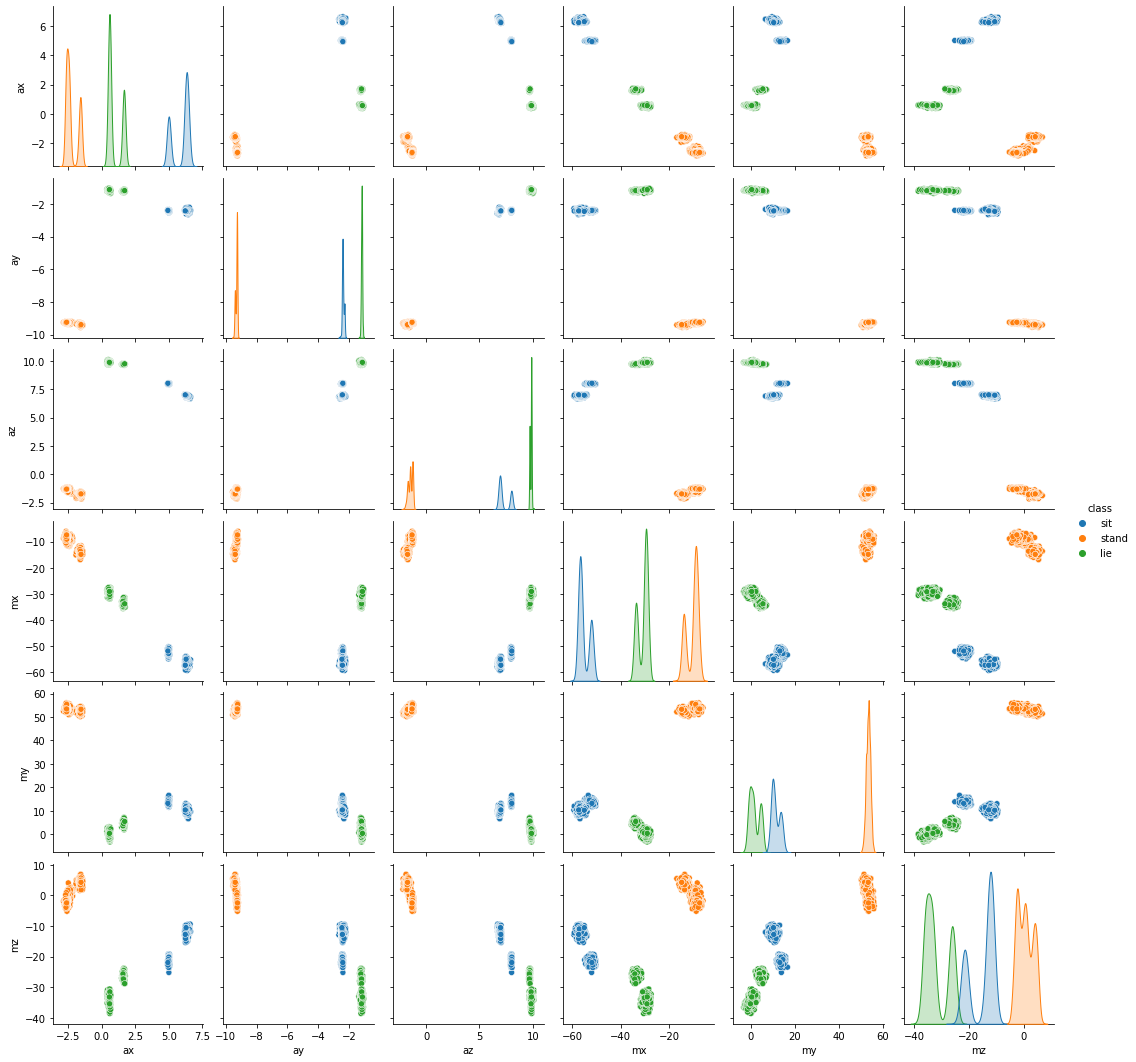

In [48]:
sns.pairplot(entire_set, hue='class')

In most of the plots we can see two neighbouring sets of data for each class. The reason for this is that in one of the three data collection instances (phone put in pocket), the phone ended up in a slightly different position in the pocket compared to the other two.

In the top left plot, plot 1:1 (ax/ax), we can that the x component of the accelerometer is clearly separable for the three classes, despite the difference in the phone position within each class.

Similar output would be expected when sitting or lying as the leg is perpendicular to earth's gravity in both cases. In plot 2:2 for example, it can be seen that the y-axis outputs for the accelerometer for the two classes are very close, but at the same time separated. Looking att plot 1:1 again, with this question in mind, it can be seen that the x-axis output is clearly separated for all classes. It can be concluded that for the y- and z-axes, the phone sits in the pocket almost identically, but not for the x-axis. This seems promising for the future model to be trained.

In general, it can be concluded that the entire dataset, both training and test (whom cannot be identified in the above plot), will be suitable for a machine learning model to be able to identify each class.

* Plot a pairplot of the features magnitude of the accelerometer and magnetometer data as well as the two angles defined previously. Explain what you see.

In [49]:
entire_set_acc_norms = calc_norms(entire_set[['ax','ay','az']])
entire_set_acc_norms.rename(columns={'Norm': 'Acc norm'}, inplace=True)

In [50]:
entire_set_mag_norms = calc_norms(entire_set[['mx','my','mz']])
entire_set_mag_norms.rename(columns={'Norm': 'Mag norm'}, inplace=True)

In [51]:
entire_set_acc_angles = calc_angles(entire_set[['ax','ay','az']], entire_set.columns[2])
entire_set_acc_angles.rename(columns={'Angle': 'Acc z angle'}, inplace=True)

In [52]:
entire_set_mag_angles = calc_angles(entire_set[['mx','my','mz']], entire_set.columns[4])
entire_set_mag_angles.rename(columns={'Angle': 'Mag y angle'}, inplace=True)

In [53]:
entire_set_norm_angle = pd.concat([\
                                   entire_set_acc_norms, \
                                   entire_set_mag_norms, \
                                   entire_set_acc_angles, \
                                   entire_set_mag_angles, \
                                   y_train.append(y_test, ignore_index=True)], \
                                  axis=1)
entire_set_norm_angle

,Acc norm,Mag norm,Acc z angle,Mag y angle,class
0,9.763345,59.741517,45.549573,80.260651,sit
1,9.692075,58.387684,46.146289,80.107264,sit
2,9.620992,58.336301,45.738177,80.416108,sit
3,9.641083,59.212776,46.012744,80.209650,sit
4,9.714518,57.816546,45.007531,81.702431,sit
...,...,...,...,...,...
4695,9.889687,44.674943,7.704727,88.003700,lie
4696,9.934491,43.734207,7.863199,87.026397,lie
4697,9.921992,44.176518,7.640464,88.686699,lie
4698,9.884591,45.085372,7.267182,89.380459,lie


#### Pairplot of the entire set's magnitudes and angles

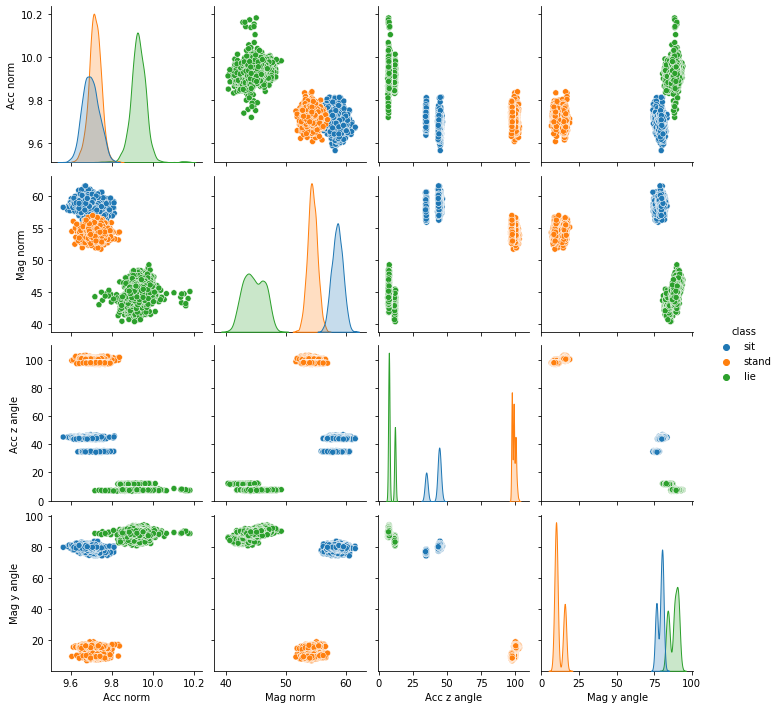

In [54]:
sns.pairplot(entire_set_norm_angle, hue='class')

In plot 1:1, it can be seen that the norms of the accelerometer are stable around 10m/s<sup>2</sup>. This is expected since no matter what motionless position the accelerometer is put in, the gravity pulls with 9.82m/s<sup>2</sup>. Thus, the resulting vector for the three accelerometer axes should have a magnitude of about 10m/s<sup>2</sup>.

The same reasoning as above holds true for plot 2:2 - the magnitude of the magnetometer output. The strength of earth's magnetic field in Sweden is about 50&micro;T, which the norms in plot 2:2 seems to suggest.

The discussion in the two paragraphs above gives reason to assume that the hardware, data collection and data processing are correct.

The accelerometer norms by themselves are not good for classification as they are very close to each other. In plot 1:3 though, where acc norm is plotted on the y-axis, and the acc z-angle on the x-axis, a clear distinction between the classes can be observed. This could be a promising determinant for classifying. Also, looking at plot 3:3 - the acc z-angle - could be used as a classifier.